In [41]:
import os # Turn of warning and information outputs
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

# Validating the execution of TensorFlow using GPU. TensorFlow is great at running things in parallel using your GPU!!
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0
TensorFlow **IS** using the GPU


I0000 00:00:1757783452.018727   18780 gpu_device.cc:2020] Created device /device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1757783452.019104   18780 gpu_device.cc:2020] Created device /device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


# Tensors

TensorFlow operates on multidimensional arrays or tensors, $T_{\mu_1 \mu_2 \mu_3 ... \mu_n}$ represented as tf.Tensor objects. For instance, a rank-1 tensor, $x_\mu$, can be created from an array:

In [42]:
x = tf.constant([1, 2])
print(x.shape)
print(x.dtype)
print(tf.rank(x))

(2,)
<dtype: 'int32'>
tf.Tensor(1, shape=(), dtype=int32)


and operated on an it as follows:

In [43]:
y = x + 1
print(y)

tf.Tensor([2 3], shape=(2,), dtype=int32)


A rank-2 tensor, $A_{\mu \nu}$, can be created from a matrix

In [44]:
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
print(A.shape)
print(tf.rank(A))

(2, 2)
tf.Tensor(2, shape=(), dtype=int32)


and operaerated on as follows:

In [45]:
A @ A # TensorFlow's dot product operator

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 7., 10.],
       [15., 22.]], dtype=float32)>

In [46]:
B = tf.constant([[5, 6], [7, 8]], dtype = tf.float32)
# Tensorflow's matrix multiplication operator
print(A @ B) 
print(B @ A)

tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[23. 34.]
 [31. 46.]], shape=(2, 2), dtype=float32)


In [47]:
A_inv = tf.linalg.inv(A)
print(tf.round(A @ A_inv))

tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)


In [48]:
sigma = tf.constant([[1.0, -1.0]], dtype=tf.float32)
print(sigma)
print(tf.transpose(sigma))
print(sigma @ tf.transpose(sigma))
print(tf.transpose(sigma) @ sigma)

tf.Tensor([[ 1. -1.]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[ 1.]
 [-1.]], shape=(2, 1), dtype=float32)
tf.Tensor([[2.]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[ 1. -1.]
 [-1.  1.]], shape=(2, 2), dtype=float32)


These objects defined so far are immutable. Any mutable state must be defined as

In [49]:
sigma = tf.Variable([0.0, 0.0, 0.0])

wich can be changed from the assign methods

In [50]:
sigma.assign([1, 2, 3])
print(sigma)
sigma.assign_add([1, 0, 0])
print(sigma)
sigma.assign_sub([0, 2.5, 127])

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([2., 2., 3.], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([   2. ,   -0.5, -124. ], dtype=float32)>

## Manipulating Shapes

Let's say we create a rank-3 tensor

In [78]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


We can reshape it to 

In [80]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)
tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


# Automatic Differentiation

To enable algorithms like Gradient Descent, TensorFlow implements automatic differentiation (autodiff).

In [51]:
x = tf.Variable(-1.0)

def f(x):
    return x**3 + x**2

print(f(x))

with tf.GradientTape() as tape:
    y = f(x)

f_prime = tape.gradient(y, x) # f_prime = 3*(x=-1)**2 + 2*(x=-1)

print(f_prime)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [52]:
x = tf.Variable(1.0)

with tf.GradientTape() as tape2:
    y = tf.exp(x)

exp_prime = tape2.gradient(y, x) # exp_prime = exp(x=1)
print(exp_prime == y) # Noicee

tf.Tensor(True, shape=(), dtype=bool)


In [53]:
x = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape3:
    y = tf.math.log(x)

log_prime = tape3.gradient(y, x) # log_prime = 1/x
print(log_prime)

tf.Tensor(0.5, shape=(), dtype=float32)


In [54]:
from tensorflow.experimental import numpy as tnp # start using tnp instead of numpy or math library
x = tf.Variable(tnp.pi)

with tf.GradientTape() as tape4:
    y = tnp.sin(x)

sin_prime = tape4.gradient(y, x) # sin_prime = cos(pi) = -1
print(sin_prime)

tf.Tensor(-1.0, shape=(), dtype=float32)


# Graphs and `tf.function`

Using the decorator `@tf.function` will enable the framework to capture the structure of your pure-TensorFlow code and optimize it into graphs of TensorFlow computations. Refer to [Intro to Graphs](https://www.tensorflow.org/guide/intro_to_graphs) for more details

In [55]:
@tf.function
def f(x):
    print('Summing...\n')
    return tf.reduce_sum(x)

x = tf.constant([[-1,2], [2, 1]])

In [56]:
print('First call...')
print(f(x))

print('Second call...')
print(f(x))

print('Another call with the same signature of the inpu tensor...')
print(f(tf.constant([[0, 0], [0,0]])))

print('One last call with a tensor of a different signature...')
print(f(tf.constant([0, 1, 200])))

First call...
Summing...

tf.Tensor(4, shape=(), dtype=int32)
Second call...
tf.Tensor(4, shape=(), dtype=int32)
Another call with the same signature of the inpu tensor...
tf.Tensor(0, shape=(), dtype=int32)
One last call with a tensor of a different signature...
Summing...

tf.Tensor(201, shape=(), dtype=int32)


# Modules, layers, and models

In [57]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [58]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [59]:
mod.weight

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [61]:
tf.saved_model.save(mod, '../models/my_module_example')

INFO:tensorflow:Assets written to: ../models/my_module_example/assets


INFO:tensorflow:Assets written to: ../models/my_module_example/assets


# Training a model from scratch

In [62]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

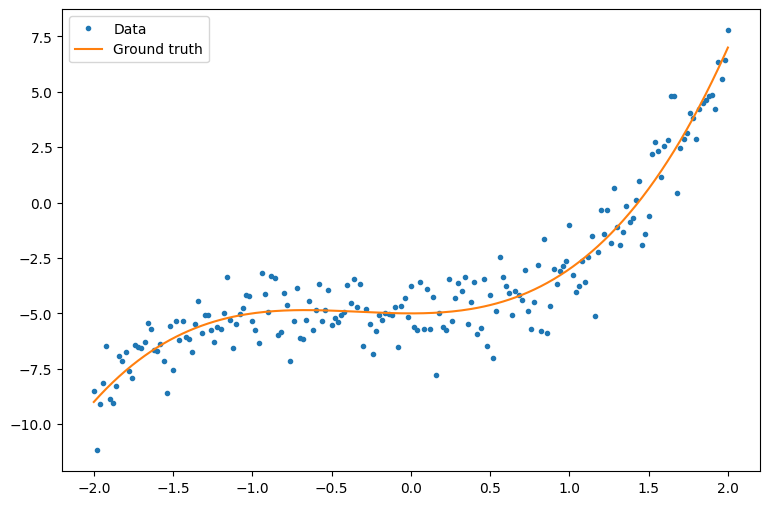

In [73]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**3 + x**2 - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [81]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2, x**3], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [87]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('../models/my_model_example/my_model_example.keras')

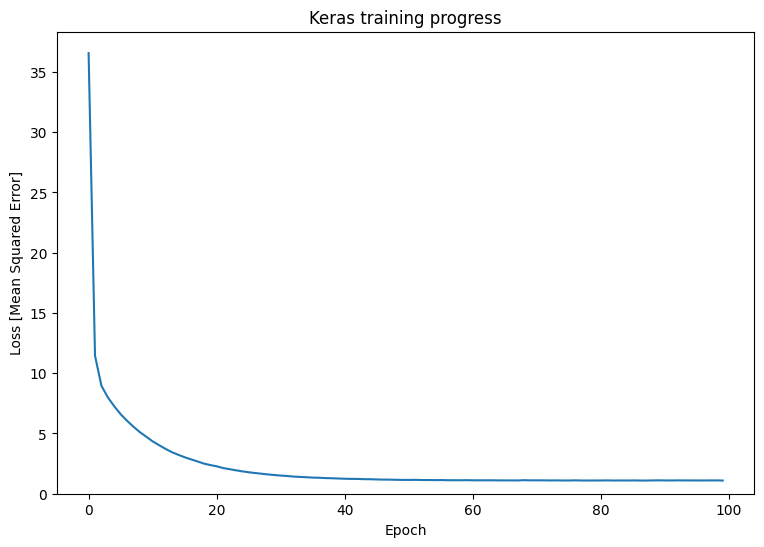

In [83]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

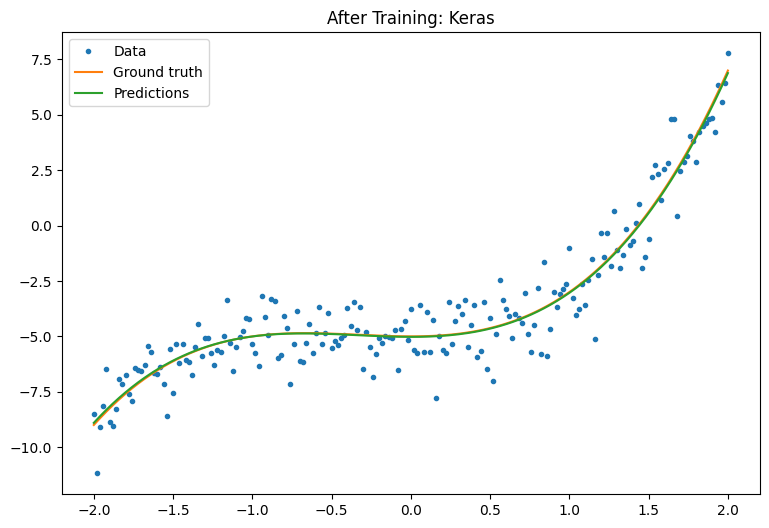

In [85]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

plot_preds(x, y, f, new_model, 'After Training: Keras')